### The data I have used in this data analysis project is a dataset of Amazon’s 50 Best Books between 2009 to 2019. I have collected the data from kaggle.com website.

### The dataset contains 550 books and has been categorized into fiction and non-fiction using Goodreads.

## Importing the necessary Python libraries

In [1]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization

""" pyplot is mainly intended for interactive plots 
    and simple cases of programmatic plot generation 
"""
import matplotlib.pyplot as plt 

""" %matplotlib inline - The resulting plots will then also be
    stored in the notebook document.
"""
%matplotlib inline

""" Seaborn is a Python data visualization library 
    based on matplotlib. It provides a high-level interface 
    for drawing attractive and informative statistical graphics.
"""
import seaborn as sns
# print('Seaborn version :', sns.__version__)
sns.set_style('whitegrid') # Set the aesthetic style of the plots

""" Python String module contains some constants, 
    utility function, and classes for string manipulation
"""
import string   
import re      # to work with RegEx

### Importing the dataset

In [2]:
df = pd.read_csv('bestsellers with categories.csv')

### Data Preparation

In [3]:
# I will rename User Rating as user_rating
df.rename(columns={"User rating": "User_Rating"}, inplace=True)

In [4]:
# Here is some data where author name has "J. K. Rowling"
df[df.Author == 'J. K. Rowling']

,Name,Author,User Rating,Reviews,Price,Year,Genre
155,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,4.9,7758,18,2019,Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction


In [5]:
# Here is some data where author name has "J.K. Rowling"
df[df.Author == 'J.K. Rowling']

,Name,Author,User Rating,Reviews,Price,Year,Genre
102,Fantastic Beasts and Where to Find Them: The O...,J.K. Rowling,4.7,4370,15,2016,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,4.0,23973,12,2016,Fiction
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,30,2017,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


In [6]:
# fixed the spellings in the data
# .loc[] Access a group of rows and columns by label(s) or a boolean array
df.loc[df.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'

# Here is the result of fixed spellings
df[df.Author == 'J.K. Rowling']

,Name,Author,User Rating,Reviews,Price,Year,Genre
102,Fantastic Beasts and Where to Find Them: The O...,J.K. Rowling,4.7,4370,15,2016,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,4.0,23973,12,2016,Fiction
155,Harry Potter and the Goblet of Fire: The Illus...,J.K. Rowling,4.9,7758,18,2019,Fiction
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,30,2017,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J.K. Rowling,4.8,13471,52,2016,Fiction
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


In [7]:
""" subtract whitespaces

    df[].apply a function along an axis of the DataFrame.
    
    lambda function is a way to create small anonymous functions,
    i.e. functions without a name. it is a one liner function
""" 

df['name_len'] = df['Name'].apply(lambda x: len(x)-x.count(" "))

In [8]:
""" string.punctuation will give the all sets of punctuation
    Syntax : string.punctuation
    Parameters : Doesn’t take any parameter, since it’s not a function.
    Returns : Return all sets of punctuation.
""" 
punctuations = string.punctuation
print('list of punctuations : ', punctuations)

list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [9]:
#percentage of punctuations
def count_punc(text):
    """This function count the number of punctuations in a text"""
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text)-text.count(" "))*100, 3)

#apply function
df['punc%'] = df['Name'].apply(lambda x: count_punc(x))
df.head(12)

,Name,Author,User Rating,Reviews,Price,Year,Genre,name_len,punc%
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,3.846
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,20.000
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,3.125
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,10.000
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,10.169
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction,36,5.556
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction,75,5.333
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction,25,4.000
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction,39,7.692
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction,20,5.000


##### In the data set, Genre is a categorical dummy variable: Fiction and non Fiction.
##### Let’s visualize the data according to the genre:


In [10]:
"""
    from the above output we can see 9, 10 both values are 
    duplicate to each other. I will remove these type of rows
"""
no_dup = df.drop_duplicates('Name')
no_dup.head(12)

,Name,Author,User Rating,Reviews,Price,Year,Genre,name_len,punc%
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,3.846
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,20.000
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,3.125
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,10.000
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,10.169
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction,36,5.556
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction,75,5.333
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction,25,4.000
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction,39,7.692
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction,20,5.000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
 7   name_len     550 non-null    int64  
 8   punc%        550 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 38.8+ KB


In [12]:
#count the no of fiction and non-fiction books
g_count = no_dup['Genre'].value_counts()
g_count

Non Fiction    191
Fiction        160
Name: Genre, dtype: int64

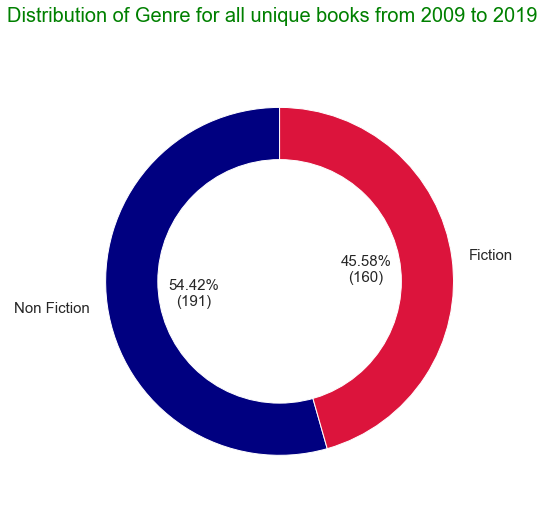

In [13]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(8,8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct, v=val)
    return my_autopct

genre_col = ['navy','crimson']
center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values), 
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

plt.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20, color='green')
plt.show()

##### Non-fiction was a more popular category than fiction, in year between 2009 to 2019. Of the 351 unique books, 54.42% (191) were non-fiction and 45.58% (160)were fiction.


##### Now let’s visualize the above insights according to each year:

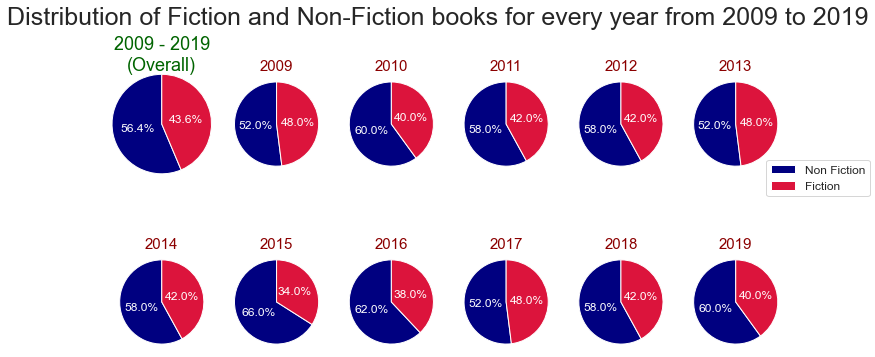

In [14]:
"""
    numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None)
    Return evenly spaced values within a given interval.
    Values are generated within the half-open interval [start, stop)
    (in other words, the interval including start but excluding stop).
"""
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)

"""
    Pandas Index.value_counts() function returns object containing
    counts of unique values. The resulting object will be in descending
    order so that the first element is the most frequently-occurring element.
    Excludes NA values by default.
"""
g_count = df['Genre'].value_counts()

""" Create a figure and a set of subplots"""
fig, ax = plt.subplots(2, 6, figsize=(12,6))

ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 12, 'color': 'white'},
            pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontdict={'fontsize': 18})

for i, year in enumerate(y1):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 15})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                  startangle=90, textprops={'size': 12,'color': 'white'}, 
                  pctdistance=0.5, colors=genre_col, radius=1.1)
    
for i, year in enumerate(y2):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                startangle=90, textprops={'size': 12,'color': 'white'},
                pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})

plt.suptitle('Distribution of Fiction and Non-Fiction books for every year from 2009 to 2019\n\n',
             fontsize=25)
# To add a list of explanation for each wedge, use the legend() function
fig.legend(g_count.index, loc='center right', fontsize=12)
plt.show()

#### From above pie chart we can clearly see that, the highest fraction (66%) of non-fiction books were sold in 2015 and the lowest(34%) for fiction books. For fiction books, the highest fraction (48%) of books were sold in 2009, 2013 and 2017, and the lowest(52%) for non-fiction books.

##### The bestselling authors are selected based on their appearances in the top 50 bestselling books each year, from 2009 to 2019. Now let’s look at the top 10 bestselling authors of both fiction and non-fiction categories:

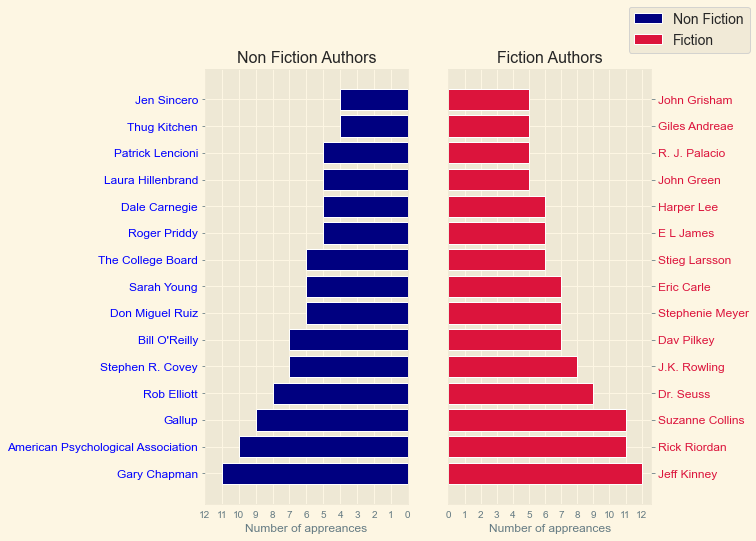

In [15]:
"""
1.  Pandas dataframe.groupby() function is used to split the data into groups based on some criteria.
    pandas objects can be split on any of their axes.
    The abstract definition of grouping is to provide a mapping of labels to group names.
    Syntax: DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, 
    group_keys=True, squeeze=False, **kwargs)
    Parameters :
    by : mapping, function, str, or iterable
    axis : int, default 0
    level : If the axis is a MultiIndex (hierarchical), group by a particular level or levels
    as_index : For aggregated output, return object with group labels as the index. Only relevant for DataFrame input. as_index=False is effectively “SQL-style” grouped output
    sort : Sort group keys. Get better performance by turning this off. Note this does not influence the order of observations within each group. groupby preserves the order of rows within each group.
    group_keys : When calling apply, add group keys to index to identify pieces
    squeeze : Reduce the dimensionality of the return type if possible, otherwise return a consistent type
    Returns : GroupBy object
    
2.  axes.barh() function in axes module of matplotlib library is used to make a horizontal bar plot.
    Syntax: Axes.barh(self, y, width, height=0.8, left=None, *, align=’center’, **kwargs)
    Parameters: This method accept the following parameters that are described below:
    y: This parameter is the sequence of y coordinates of the bar.
    height: This parameter is the height(s) of the bars.
    width: This parameter is an optional parameter. And it is the width(s) of the bars with default value 0.8.
    
3.  axis.invert_xaxis() function in axes module of matplotlib library is used to invert the x-axis.
4.  yaxis.tick_left()   Move ticks and ticklabels (if present) to the left of the axes.
"""
best_nf_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:15]
best_f_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:15]
# Solarize_Light2 is the pink color background of this table
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(8,8))
    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values, color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticks(best_nf_authors.index)
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, color='blue')
    ax[0].set_xlabel('Number of appreances')
    ax[0].set_title('Non Fiction Authors')
    
    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticks(best_f_authors.index)
    ax[1].set_yticklabels(best_f_authors.index, fontsize=12, color='crimson')
    ax[1].set_title('Fiction Authors')
    ax[1].set_xlabel('Number of appreances')
    
    fig.legend(['Non Fiction', 'Fiction'], fontsize=14)
    
plt.show()

##### Top-selling authors are selected based on their appearances in the top 50 best-selling books each year. The number of appearances includes duplicate book names. Their unique posts and overall reviews are featured below:

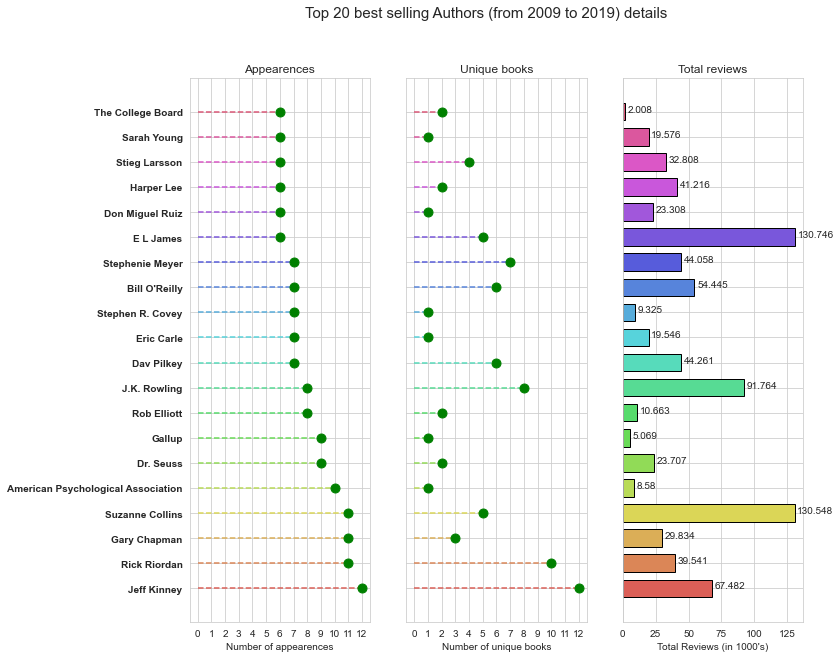

In [16]:
n_best = 20

top_authors = df.Author.value_counts().nlargest(n_best)
no_dup = df.drop_duplicates('Name') # removes all rows with duplicate book names

fig, ax = plt.subplots(1, 3, figsize=(11,10), sharey=True)

color = sns.color_palette("hls", n_best)

ax[0].hlines(y=top_authors.index , xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticks(top_authors.index)
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearences')

book_count = []
total_reviews = []
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)
ax[1].hlines(y=top_authors.index , xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

plt.suptitle('Top 20 best selling Authors (from 2009 to 2019) details', fontsize=15)
plt.show()

##### We can see that,  author Jeff Kinney is the best-selling author with 12 appearances in best-selling books from 2009 to 2019.